# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

In [41]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
# Read csv file using pandas

df = pd.read_csv('steam-200k.csv')
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


# EDA

In [43]:
# remane the column name as games user_id, hoursplay and status
df.columns = ['User_ID','games','Status','Hoursplay','0']
df

,User_ID,games,Status,Hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [44]:
#drop 0 column
df.drop('0',axis=1,inplace=True)
df.head()

,User_ID,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [45]:
#drop duplicate user_id and games keep the last one
df.drop_duplicates(subset=['User_ID','games'],keep='last')

,User_ID,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9
...,...,...,...,...
199990,128470551,Fallen Earth,play,2.4
199992,128470551,Magic Duels,play,2.2
199994,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,play,1.5


In [46]:
#check the shape of the dataset
df.shape

(199999, 4)

In [47]:
#check columns of the dataset
df.columns

Index(['User_ID', 'games', 'Status', 'Hoursplay'], dtype='object')

In [48]:
# Check which columns are having categorical, numerical or boolean values of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    199999 non-null  int64  
 1   games      199999 non-null  object 
 2   Status     199999 non-null  object 
 3   Hoursplay  199999 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [49]:
# Check for missing values in all the columnns of the train_dataset
df.isnull().sum()

User_ID      0
games        0
Status       0
Hoursplay    0
dtype: int64

<AxesSubplot:ylabel='games'>

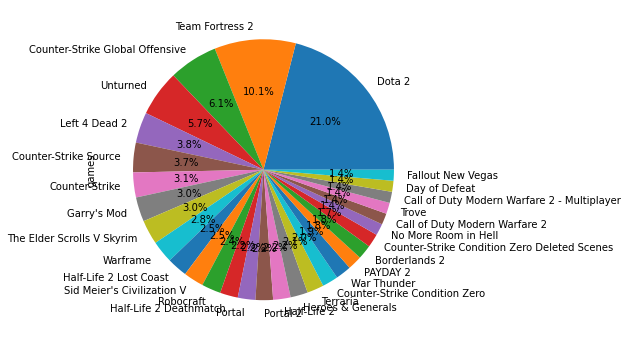

In [50]:
# get how many unique values are in games column of dataset
df['games'].value_counts().head(30).plot(kind='pie',figsize =(18,6),autopct='%1.1f%%')

In [51]:
# get the total count of play and total count of purchase
df['Status'].value_counts()

purchase    129510
play         70489
Name: Status, dtype: int64

In [52]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
df.describe()

,User_ID,Hoursplay
count,1.999990e+05,199999.000000
mean,1.036556e+08,17.874468
std,7.208084e+07,138.057292
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


## visualizing data

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Hoursplay'}>]], dtype=object)

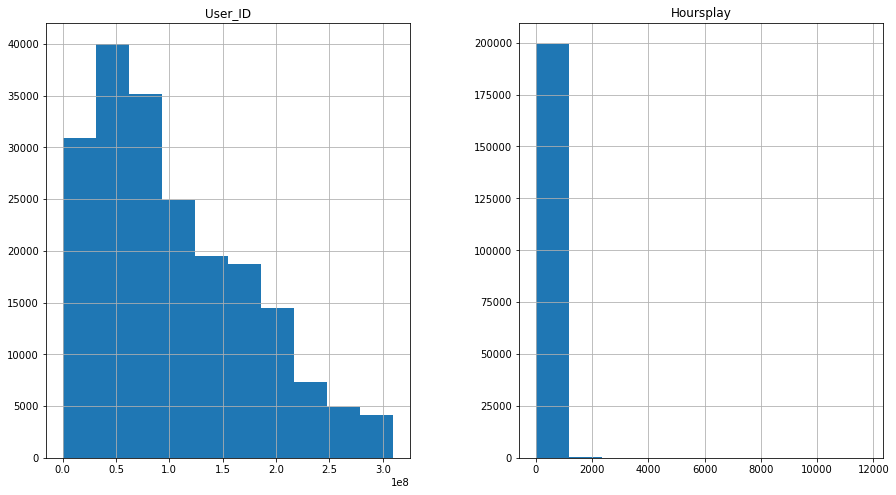

In [53]:
# Histogram using pandas 
df.hist(figsize=(15,8))

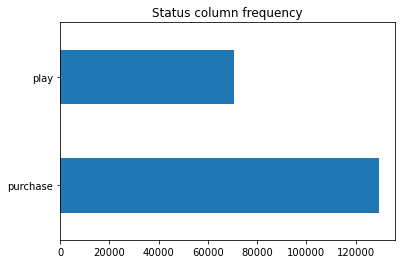

In [54]:
# plot a horizontal bar plot of column status
df['Status'].value_counts().plot.barh()
plt.title('Status column frequency')
plt.show()

In [55]:
#plot a count plot of hoursplay column
df['Hoursplay'].value_counts()

1.0       130568
0.2         3016
0.3         2517
0.4         2129
0.5         1813
           ...  
724.0          1
737.0          1
3503.0         1
1397.0         1
1310.0         1
Name: Hoursplay, Length: 1593, dtype: int64

<AxesSubplot:>

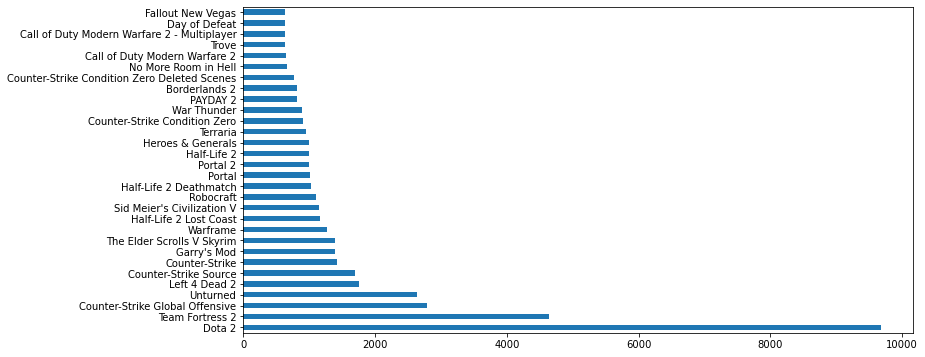

In [56]:
# plot a horizontal bar plot of games column for top 30 games
plt.figure(figsize=(12,6))
df['games'].value_counts()[:30].plot.barh()

<AxesSubplot:xlabel='Status', ylabel='Hoursplay'>

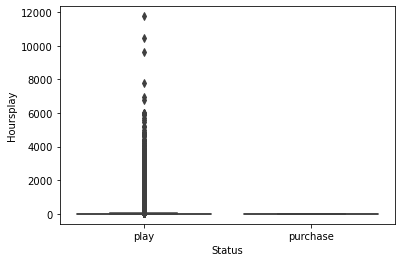

In [57]:
# plot a boxplot of status as x-axis and hoursplay as y-axis
sns.boxplot(data=df,x='Status',y='Hoursplay')

# converting hours to rating

In [58]:
df.columns

Index(['User_ID', 'games', 'Status', 'Hoursplay'], dtype='object')

In [59]:
df= df[(df['Hoursplay']>=2) & (df['Status']=='play')]
df = df[df.groupby('games').User_ID.transform(len)>=20]

In [60]:
#print the average
average = df.groupby(['games'],as_index = False).Hoursplay.mean()

In [61]:
# comvert the hoursplay into rating
average['avg_Hoursplay']=average['Hoursplay']
average.drop(columns ='Hoursplay',inplace = True )
average.head()

,games,avg_Hoursplay
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982812
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674


In [62]:
df = df.merge(average,on = 'games')
df.head()

,User_ID,games,Status,Hoursplay,avg_Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792


In [63]:
condition = [
    df['Hoursplay']>= (0.8*df['avg_Hoursplay']),
   (df['Hoursplay']>=0.6*df['avg_Hoursplay'])&(df['Hoursplay']<0.8*df['Hoursplay']),
   (df['Hoursplay']>=0.4*df['avg_Hoursplay'])&(df['Hoursplay']<0.6*df['Hoursplay']),
   (df['Hoursplay']>=0.2*df['avg_Hoursplay'])&(df['Hoursplay']<0.4*df['Hoursplay']),
    df['Hoursplay']>=0
    
]
values = [5,4,3,2,1]
df['rating'] = np.select(condition,values)

In [64]:
df.head()

,User_ID,games,Status,Hoursplay,avg_Hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,1
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5


In [65]:
# keep only important columns( user_id, games,rating ) drop everthing else 
df.drop(['Status','Hoursplay','avg_Hoursplay'],axis=1,inplace=True)
df.head()

,User_ID,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,1
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5


# MEMORY BASED COLLABORATIVE FILTERING

Memory-based algorithms approach the collaborative filtering problem by using the entire database.It tries to find users that are similar to the active user (i.e. the users we want to make predictions for), and uses their preferences to predict ratings for the active user.

In [66]:
#import pairwise_distances, cosine, corelation
from sklearn.metrics.pairwise import pairwise_distances,cosine_similarity
from scipy.spatial.distance import cosine,correlation

In [67]:
# create pivot table containing user_id as index, games as columns, ratings as values
pivot_tabel = df.pivot_table(index=['User_ID'],columns=['games'],values = 'rating')
pivot_tabel

games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
User_ID,,,,,,,,,,,,,,,,,,,,,
5250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
298950,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309255941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309265377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309404240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalize the values in pivot table
df=pivot_tabel.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)
df = df.fillna(0)
df = df.T
df = df.loc[:,(df != 0).any(axis=0)]
# Drop all columns containing only zeros representing users who did not rate


In [70]:
df.head()

User_ID,5250,76767,86540,229911,298950,547685,554278,561758,748719,975449,...,295981434,297517705,297690673,298178235,298222970,298389371,298547051,298890193,300620379,302228798
games,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,0.0,0.0,0.0,0.0,-0.37037,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
APB Reloaded,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARK Survival Evolved,0.0,0.0,0.0,0.0,-0.37037,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ace of Spades,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AdVenture Capitalist,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# import scipy, operator
import scipy as sp
import operator

In [72]:
# convert the data into sparse matrix format to be read by the following functions

matrix=sp.sparse.csr_matrix(df.values)
matrix

<431x2437 sparse matrix of type '<class 'numpy.float64'>'
	with 28662 stored elements in Compressed Sparse Row format>

In [73]:
# create matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.
item_similarity=cosine_similarity(matrix)
user_similarity=cosine_similarity(matrix.T)


In [74]:
# Inserting the similarity matricies into dataframe objects

#item similarity dataframe
data_item = pd.DataFrame(item_similarity,index = df.index ,columns = df.index)
# User_similarity dataframe
data_user = pd.DataFrame(user_similarity , index= df.columns,columns=df.columns)

In [75]:
# write a function which will return the top 10 games with the highest cosine similarity value

def top_games(games):
    count=1
    print('The similarity games of {}/n'.format(games))
    for item in data_item.sort_values(ascending=False,by=games).index[1:6]:
        print('No.{}={}'.format(count,item))
        count+=1

In [76]:
top_games('Spore')

The similarity games of Spore/n
No.1=Mortal Kombat X
No.2=Sid Meier's Civilization Beyond Earth
No.3=Space Engineers
No.4=Watch_Dogs
No.5=Medieval II Total War


In [78]:
# check the column of pivot table
df.columns # check the column of pivot table


Int64Index([     5250,     76767,     86540,    229911,    298950,    547685,
               554278,    561758,    748719,    975449,
            ...
            295981434, 297517705, 297690673, 298178235, 298222970, 298389371,
            298547051, 298890193, 300620379, 302228798],
           dtype='int64', name='User_ID', length=2437)

In [79]:
# write a function which will return the top 5 users with the highest similarity value 
def user_id(user):
    if user not in df.columns:
        print('No data available for this user {}'.format(user))
    sim_val = data_user.sort_values(by =user,ascending=False).loc[:,user].tolist()[1:6]
    sim_user = data_user.sort_values(by = user,ascending=False).index[1:6]
    zipped = zip(sim_user,sim_val)
    for user, sim in zipped:
        print('user #{0},similarity values :{1:.2f}'.format(user,sim))

In [80]:
user_id(295981434)

user #205058166,similarity values :0.61
user #247065555,similarity values :0.50
user #215721461,similarity values :0.50
user #29764828,similarity values :0.50
user #38436635,similarity values :0.35


In [84]:
# write a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list
def simi_user_recs(user):
    if user not in df.columns:
        print('No data available for this user {}'.format(user))
    sim_user = data_user.sort_values(by = user,ascending=False).index[1:11]
    best = []
    most_common = {}
    for i in sim_user:
        max_scorce = df.loc[:,i].max()
        best.append(df[df.loc[:,i] == max_scorce].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] =+1
            else :
                most_common[j] =1
    sorted_item = sorted(most_common.items(),key=operator.itemgetter(1),reverse=True)
    return sorted_item[:6]

In [85]:
simi_user_recs(76767)


[('Call of Duty Black Ops', 1),
 ('Call of Duty Modern Warfare 2', 1),
 ('Call of Duty Modern Warfare 2 - Multiplayer', 1),
 ('H1Z1', 1),
 ('Worms Revolution', 1),
 ('Counter-Strike', 1)]

# COLLABORATIVE FILTERING USING KNN

Collaborative Filtering Using k-Nearest Neighbors (kNN). kNN is a machine learning algorithm to find clusters of similar users based on common ratings, and make predictions using the average rating of top-k nearest neighbors.

https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/

In [86]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
#make an object for the NearestNeighbors Class.
knn = NearestNeighbors(algorithm='brute',leaf_size=30,metric='cosine',metric_params=None,n_jobs=-1,n_neighbors=20,p=2,radius=1)
# fit the dataset
knn.fit(df)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20,
                 radius=1)


Test model and make some recommendations:

In [87]:
# choose random game
random=np.random.choice(df.shape[0])
# print the name of random game
print("The random game is = ",df.index[random])

# use kNN algorithm to measures distance to determine the closeness of instances.
distance , indices =knn.kneighbors(df.iloc[random,:].values.reshape(1,-1),n_neighbors=6)

# pick most popular games among the neighbors and print their names
for i in range(0,len(distance.flatten())):
    if i == 0:
        print('Recommendation for {0} \n'.format(df.index[random]))
    else:
        print('{0} : {1} with distance of {2}'.format(i,df.index[indices.flatten()[i]], distance.flatten()[i]))


The random game is =  AirMech
Recommendation for AirMech 

1 : WAKFU with distance of 0.8709790430080948
2 : Scribblenauts Unlimited with distance of 0.9053248424897957
3 : Star Conflict with distance of 0.9119313032200689
4 : Spiral Knights with distance of 0.9132562184482996
5 : R.U.S.E with distance of 0.9191043216878958


#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 

#Congratulation for completing the assignment.
You have learned a lot while doing this assignment.

